# Test pipeline of the project

## Dataset

In [2]:
import os
from src.utils.data_loading_functions import *

In [3]:
label_path="data/MLinApp_course_data/tcga_mir_label.csv"
data_path="data/MLinApp_course_data/tcga_mir_rpm.csv"

miRna_labels, miRna_data, miRna_tissues = load_data(data_path, label_path)

### Preprocessing data: class balancing, normalization and split.

In [4]:
miRna_data, miRna_labels , _, _, _, _ = class_balancing(miRna_labels, miRna_data, miRna_tissues)

miRna_data = normalize_data(miRna_data)

train_data, test_data, train_label, test_label = split_data(miRna_data, miRna_labels)

Adjusting dataset...
Removed classes: 'COAD' 'LAML' 'OV' 'GBM'!


Balancing BRCA data...
BRCA data balanced!


Processing labels...
Done!
['ACC' 'BLCA' 'BRCA' 'CESC' 'CHOL' 'DLBC' 'ESCA' 'HNSC' 'KICH' 'KIRC'
 'KIRP' 'LGG' 'LIHC' 'LUAD' 'LUSC' 'MESO' 'PAAD' 'PCPG' 'PRAD' 'READ'
 'SARC' 'SKCM' 'STAD' 'TGCT' 'THCA' 'THYM' 'UCEC' 'UCS' 'UVM']
['Adrenal gland' 'Base of tongue' 'Bladder'
 'Bones, joints and articular cartilage of limbs'
 'Bones, joints and articular cartilage of other and unspecified sites'
 'Brain' 'Breast' 'Bronchus and lung' 'Cervix uteri' 'Colon'
 'Connective, subcutaneous and other soft tissues' 'Corpus uteri'
 'Esophagus' 'Eye and adnexa' 'Floor of mouth' 'Gallbladder' 'Gum'
 'Heart, mediastinum, and pleura' 'Hypopharynx' 'Kidney' 'Larynx' 'Lip'
 'Liver and intrahepatic bile ducts' 'Lymph nodes' 'Meninges' 'Oropharynx'
 'Other and ill-defined sites'
 'Other and ill-defined sites in lip, oral cavity and pharynx'
 'Other and unspecified major salivary glands'
 'Other and

We are gonna use only the test data because we don't need to train.

## Intelligent Reasoning

In [9]:
from src.utils.metadata_functions import *
from src.utils.utils import *
from src.utils.statistics import *

These superclasses are selected in the training phase of the representation procesess

In [10]:
superclasses = { '0' :
    ['BRCA', 'KICH', 'KIRC', 'LUAD', 'LUSC', 'MESO', 'SARC', 'UCEC'], '1' :
    ['BLCA', 'CESC', 'HNSC', 'KIRP', 'PAAD', 'READ', 'STAD'], '2' :
    ['DLBC', 'LGG', 'PRAD', 'TGCT', 'THYM', 'UCS'], '3' :
    ['ACC', 'CHOL', 'LIHC'], '4' :
    ['ESCA', 'PCPG', 'SKCM', 'THCA', 'UVM']
}

### Metadata creation and classification

In [11]:
test_superlabel = lab2super(test_label, superclasses)

In [12]:
ovo, ovr = load_ovo_ovr('_trained_1')

FileNotFoundError: [Errno 2] No such file or directory: 'src/models/metadata/ovo_trained_1.pkl'

Creation of test metadata

In [8]:
meta_data = meta_data_creation_test(ovo, ovr, test_data, test_superlabel)

Starting test set metadata creation...

Metadata for the whole dataset created!


In [9]:
meta_data.shape

(1865, 15)

In [10]:
rf = load_model('src/models/metadata/', 'rf_trained_1')

d:\miRNA Project\cancer_miRNA_classification_with_spiking_neural_network\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\miRNA Project\cancer_miRNA_classification_with_spiking_neural_network\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
prediction = rf.predict(meta_data)

array([[0.88, 0.06, 0.03, 0.03, 0.01],
       [0.04, 0.91, 0.03, 0.02, 0.  ],
       [0.  , 0.04, 0.95, 0.  , 0.  ],
       [0.09, 0.03, 0.01, 0.83, 0.04],
       [0.01, 0.02, 0.01, 0.07, 0.89]])

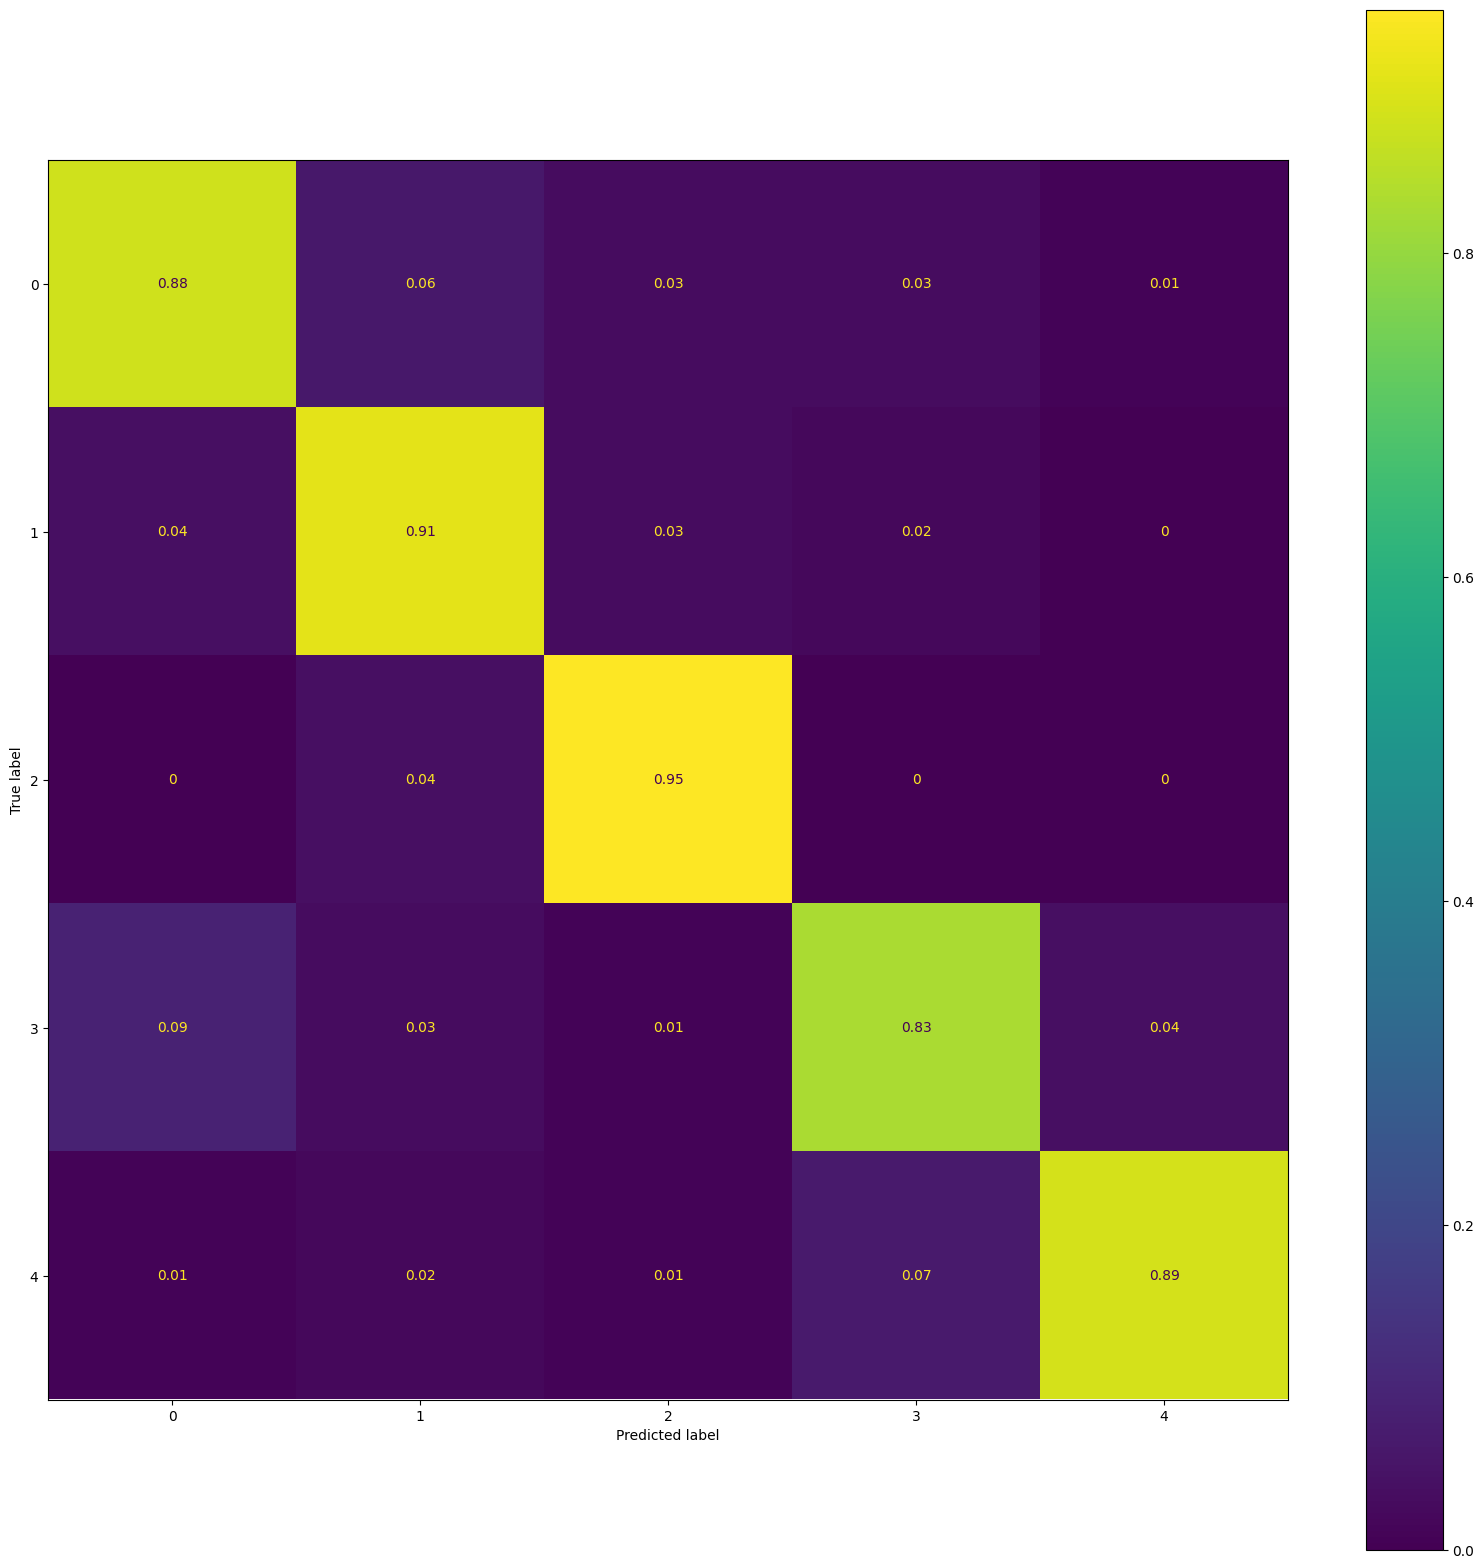

In [12]:
show_matrix(test_superlabel, prediction, superclasses.keys())


In [13]:
# Get some statistics
from sklearn.metrics import classification_report
print(classification_report(test_superlabel, prediction))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       674
           1       0.88      0.91      0.89       491
           2       0.88      0.95      0.91       282
           3       0.68      0.83      0.75       121
           4       0.96      0.89      0.92       297

    accuracy                           0.90      1865
   macro avg       0.87      0.89      0.88      1865
weighted avg       0.90      0.90      0.90      1865


## CNN and SCNN classification

In [14]:
# TODO: add all the test pipeline of the CNN and SCNN classification.
from src.utils.dataloader import load_dataset
from src.models.CNN import CNN
from src.models.SCNN import SCNN

import torch
import torch.nn as nn
import torch.optim as optim

import os
import json

def get_device():
    if torch.cuda.is_available():
        return 'cuda'
    elif torch.backends.mps.is_available():
        return 'mps'
    else:
        return 'cpu'

device = get_device()
print(device)
# device = 'cpu'

cuda


In [15]:
superclasses = [
    ['BRCA', 'KICH', 'KIRC', 'LUAD', 'LUSC', 'MESO', 'SARC', 'UCEC'],
    ['BLCA', 'CESC', 'HNSC', 'KIRP', 'PAAD', 'READ', 'STAD'],
    ['DLBC', 'LGG', 'PRAD', 'TGCT', 'THYM', 'UCS'],
    ['ACC', 'CHOL', 'LIHC'],
    ['ESCA', 'PCPG', 'SKCM', 'THCA', 'UVM']
]

In [16]:
import snntorch as snn


def load_params(typeof='cnn', num_class=0):
    '''
    Load the parameters of the model.

    Args:
        typeof (str): type of the model, cnn or scnn.
        num_class (int): number of classes.

    Returns:
        params (dict): dictionary with the parameters of the model.
    '''
    assert typeof.startswith(('cnn', 'scnn')), 'Type of model not supported'
    params_path = os.path.join('data', 'params', typeof, f'{typeof}_class{num_class}.json')

    return json.loads(open(params_path).read())

def set_model(model_name: str, num_classes: int, params: dict):
    '''
    Set the model with its parameters, given the name of the model, the class number and the parameters.

    Args:
        model_name (str): name of the model.
        num_class (int): class index.
        params (dict): dictionary with the parameters of the model.
    
    Returns:
        model (nn.Module): model with the parameters set.
    '''
    filter_numbers = [params['nf1'], params['nf2'], params['nf3']]
    convolution_windows = [params['cw1'], params['cw2'], params['cw3']]
    max_pooling_windows = [params['pw1'], params['pw2'], params['pw3']]
    if model_name.startswith('cnn'):
        dropout = [params['dropout_0'], params['dropout_1']]
    else:
        beta = params['beta']
    final_nf = params['nf4']
    
    if model_name.startswith('cnn'):
        model = CNN(num_classes, filter_numbers, convolution_windows, max_pooling_windows, final_nf, dropout)
    else:
        model = model = nn.Sequential(
        nn.Conv1d(in_channels=1, out_channels=filter_numbers[0], kernel_size=convolution_windows[0]),
        nn.MaxPool1d(kernel_size=max_pooling_windows[0]),
        snn.Leaky(beta=beta, spike_grad=snn.surrogate.fast_sigmoid(), init_hidden=True, learn_beta=True),
        nn.Conv1d(in_channels=filter_numbers[0], out_channels=filter_numbers[1], kernel_size=convolution_windows[1]),
        nn.MaxPool1d(kernel_size=max_pooling_windows[1]),
        snn.Leaky(beta=beta, spike_grad=snn.surrogate.fast_sigmoid(), init_hidden=True, learn_beta=True),
        nn.Conv1d(in_channels=filter_numbers[1], out_channels=filter_numbers[2], kernel_size=convolution_windows[2]),
        nn.MaxPool1d(kernel_size=max_pooling_windows[2]),
        snn.Leaky(beta=beta, spike_grad=snn.surrogate.fast_sigmoid(), init_hidden=True, learn_beta=True),
        nn.Flatten(),
        nn.LazyLinear(final_nf),
        nn.Linear(final_nf, num_classes),
        snn.Leaky(beta=beta, spike_grad=snn.surrogate.fast_sigmoid(), init_hidden=True, output=True, learn_beta=True)
    )
    model.to(device)
    return model

def load_model(model_path: str, typeof: str, num_class: int, params: dict):
    '''
    Load the model given the path, the type and the class number.

    Args:
        model_path (str): path of the model.
        typeof (str): type of the model.
        num_class (int): class index.

    Returns:
        model (nn.Module): model loaded.
    '''
    assert typeof.startswith(('cnn', 'scnn')), 'Type of model not supported'
    filepath = os.path.join(model_path, f'{typeof}_class{num_class}.pth')
    model = set_model(typeof, num_class, params)
    model.load_state_dict(torch.load(filepath))
    return model

In [20]:
from snntorch import backprop
from snntorch import functional as SF
from snntorch import utils

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    return correct

def test_accuracy(data_loader, net, num_steps, population_code=False, num_classes=False):
  with torch.no_grad():
    total = 0
    acc = 0
    net.eval()

    data_loader = iter(data_loader)
    for data, targets in data_loader:
      data = data.to(device)
      targets = targets.to(device)
      utils.reset(net)
      spk_rec, _ = net(data)

      if population_code:
        acc += SF.accuracy_rate(spk_rec.unsqueeze(0), targets, population_code=True, num_classes=num_classes) * spk_rec.size(1)
      else:
        acc += SF.accuracy_rate(spk_rec.unsqueeze(0), targets) * spk_rec.size(1)
        
      total += spk_rec.size(1)

  return acc/total

def experiment(model_name: str, params: dict, metalabel: int, labels_of_metaclass, epochs:int, mode: str = 'train'):
    num_classes = len(labels_of_metaclass)

    print(f'METACLASS LABELS: {labels_of_metaclass}')
    train_dataloader, test_dataloader = load_dataset(name='cancer', batch_size=params['batch_size'],
                                                     metalabel=metalabel, labels_of_metaclass=labels_of_metaclass)

    if mode == 'train':
        model = set_model(model_name, num_classes, params)
    else:
        model = load_model(os.path.join('models', model_name), model_name, metalabel, params)
    epochs = epochs  # TODO: be careful
    
    
    loss_fn = SF.mse_count_loss(correct_rate=1.0, incorrect_rate=0.0) if model_name.startswith('scnn') else nn.CrossEntropyLoss()
    
    # optimizer = torch.optim.SGD(model.parameters(), lr=params['lr'])
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])
    num_steps = params['num_step']

    for t in range(epochs):
        if t % 10 == 0:
            print(f"Epoch {t + 1}\n-------------------------------")
        if mode == 'train':
            if model_name.startswith('cnn'):
                train(train_dataloader, model, loss_fn, optimizer)
            else:
                 backprop.BPTT(model, train_dataloader, num_steps=num_steps,
                            optimizer=optimizer, criterion=loss_fn, time_var=False, device=device)

        if t % 10 == 0:
            if model_name.startswith('cnn'):
                accuracy = test(test_dataloader, model, loss_fn)
            else:
                accuracy = test_accuracy(test_dataloader, model, num_steps=num_steps)
            print(accuracy)
    print("Done!")
    print(f"Accuracy for superclass {metalabel}: {accuracy}")

    
    # input('Premi un tasto per concludere l esperimento...')
    # Sorre: Ho modificato il path per salvare i modelli all'interno della cartella models e non data/models
    save_filepath = os.path.join('models', model_name)
    if not os.path.exists(save_filepath):
        os.makedirs(save_filepath)

    if mode == 'train':    
        torch.save(model.state_dict(), os.path.join(save_filepath, f'{model_name}_class{metalabel}.pth'))

    # Call the save_model function to save the model



In [21]:
model_name = 'scnn'
epochs = 100

In [22]:

for metalabel in range(5):
    params = load_params(model_name, metalabel)
    metaclass_labels = superclasses[metalabel]
    experiment(
        model_name=model_name,
        params=params,
        metalabel= metalabel,
        labels_of_metaclass=metaclass_labels,
        epochs=epochs
    )

METACLASS LABELS: ['BRCA', 'KICH', 'KIRC', 'LUAD', 'LUSC', 'MESO', 'SARC', 'UCEC']
Epoch 1
-------------------------------


C:\Users\aless\Documents\GitHub\cancer_miRNA_classification_with_spiking_neural_network\venv\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


0.17814171122994651
Epoch 11
-------------------------------
0.17814171122994651
Epoch 21
-------------------------------
0.17814171122994651
Epoch 31
-------------------------------
0.17814171122994651
Epoch 41
-------------------------------
0.17814171122994651
Epoch 51
-------------------------------
0.17814171122994651
Epoch 61
-------------------------------
0.17814171122994651
Epoch 71
-------------------------------
0.17814171122994651
Epoch 81
-------------------------------
0.17814171122994651
Epoch 91
-------------------------------
0.17814171122994651
Done!
Accuracy for superclass 0: 0.17814171122994651
METACLASS LABELS: ['BLCA', 'CESC', 'HNSC', 'KIRP', 'PAAD', 'READ', 'STAD']
Epoch 1
-------------------------------


C:\Users\aless\Documents\GitHub\cancer_miRNA_classification_with_spiking_neural_network\venv\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


0.1791216413551402
Epoch 11
-------------------------------
0.1791216413551402
Epoch 21
-------------------------------
0.1791216413551402
Epoch 31
-------------------------------
0.1791216413551402
Epoch 41
-------------------------------
0.1791216413551402
Epoch 51
-------------------------------
0.1791216413551402
Epoch 61
-------------------------------
0.1791216413551402
Epoch 71
-------------------------------
0.1791216413551402
Epoch 81
-------------------------------
0.1791216413551402
Epoch 91
-------------------------------
0.1791216413551402
Done!
Accuracy for superclass 1: 0.1791216413551402
METACLASS LABELS: ['DLBC', 'LGG', 'PRAD', 'TGCT', 'THYM', 'UCS']
Epoch 1
-------------------------------


C:\Users\aless\Documents\GitHub\cancer_miRNA_classification_with_spiking_neural_network\venv\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


0.014690170940170942
Epoch 11
-------------------------------
0.014690170940170942
Epoch 21
-------------------------------
0.014690170940170942
Epoch 31
-------------------------------
0.014690170940170942
Epoch 41
-------------------------------
0.014690170940170942
Epoch 51
-------------------------------
0.014690170940170942
Epoch 61
-------------------------------
0.014690170940170942
Epoch 71
-------------------------------
0.014690170940170942
Epoch 81
-------------------------------
0.04941239316239316
Epoch 91
-------------------------------
0.021634615384615388
Done!
Accuracy for superclass 2: 0.021634615384615388
METACLASS LABELS: ['ACC', 'CHOL', 'LIHC']
Epoch 1
-------------------------------


C:\Users\aless\Documents\GitHub\cancer_miRNA_classification_with_spiking_neural_network\venv\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


0.11375
Epoch 11
-------------------------------
0.11375
Epoch 21
-------------------------------
0.11375
Epoch 31
-------------------------------
0.11375
Epoch 41
-------------------------------
0.11375
Epoch 51
-------------------------------
0.11375
Epoch 61
-------------------------------
0.11375
Epoch 71
-------------------------------
0.11375
Epoch 81
-------------------------------
0.11375
Epoch 91
-------------------------------
0.7959375
Done!
Accuracy for superclass 3: 0.7959375
METACLASS LABELS: ['ESCA', 'PCPG', 'SKCM', 'THCA', 'UVM']
Epoch 1
-------------------------------


C:\Users\aless\Documents\GitHub\cancer_miRNA_classification_with_spiking_neural_network\venv\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


0.1753472222222222
Epoch 11
-------------------------------
0.17847222222222223
Epoch 21
-------------------------------
0.3020833333333333
Epoch 31
-------------------------------
0.36006944444444444
Epoch 41
-------------------------------
0.3336805555555556
Epoch 51
-------------------------------
0.37569444444444444
Epoch 61
-------------------------------
0.33854166666666663
Epoch 71
-------------------------------
0.3506944444444444
Epoch 81
-------------------------------
0.3694444444444444
Epoch 91
-------------------------------
0.4149305555555556
Done!
Accuracy for superclass 4: 0.4149305555555556


In [2]:
import pandas as pd
import os

df = pd.read_csv(os.path.join('data', 'results', 'scnn_population_encoding.csv'))

# Convert 'metalabel' to string to group them together
df['metalabel'] = df['metalabel'].astype(str)

# Find rows with maximum accuracy for each 'metalabel'
max_accuracy_rows = df.loc[df.groupby('metalabel')['accuracy'].idxmax()]

# Display the resulting DataFrame with the rows having the best accuracies for each 'metalabel' 
print(max_accuracy_rows)

    Unnamed: 0 metalabel  neurons_per_classes  accuracy
10          10       0.0                100.0    37.049
1            1       1.0                 25.0    17.912
7            7       2.0                 50.0    43.777
8            8       3.0                 50.0    79.594
14          14       4.0                100.0    58.854
